<center><h1>Quora Question Pairs</h1></center>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import re
from nltk.corpus import stopwords
# import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import	re	#	Regular	expression	library
import	string
from nltk.stem import WordNetLemmatizer
from	nltk.tokenize	import	word_tokenize
import gensim
from gensim.parsing.preprocessing import remove_stopwords 
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


# Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
missing = pd.DataFrame(df.isnull().sum(), columns=['Missing value '])

cm = sns.light_palette("blue", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing value
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


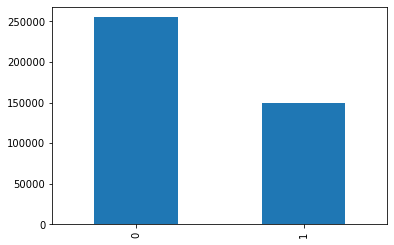

In [7]:
df["is_duplicate"].value_counts().plot(kind='bar')
plt.show()

In [8]:
print("Question pairs are not Similar (is_duplicate = 0):  {}%".format(100 - round(df["is_duplicate"].mean()*100,2)))
print("Question pairs are Similar (is_duplicate =1):   {}%".format(round(df["is_duplicate"].mean()*100,2)))

Question pairs are not Similar (is_duplicate = 0):  63.08%
Question pairs are Similar (is_duplicate =1):   36.92%


In [9]:
qids = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
unique_qs = len(np.unique(qids))
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))


qs_morethan_onetime = np.sum(qids.value_counts()>1)

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



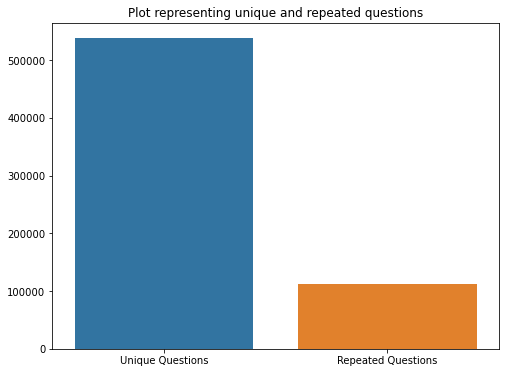

In [10]:
x = ["Unique Questions","Repeated Questions"]
y = [unique_qs,qs_morethan_onetime]
plt.figure(figsize=(8,6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x,y)
plt.show()

In [11]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [12]:
df_na = df.fillna('')
nan_rows = df_na[df_na.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [13]:
df.dropna()  

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [14]:
df_na.isnull().count()

id              404290
qid1            404290
qid2            404290
question1       404290
question2       404290
is_duplicate    404290
dtype: int64

In [15]:
df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()


In [16]:
df['q1_num_words'] = df_na['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df_na['question2'].apply(lambda row: len(row.split(" ")))

(-0.5, 1439.5, 1079.5, -0.5)

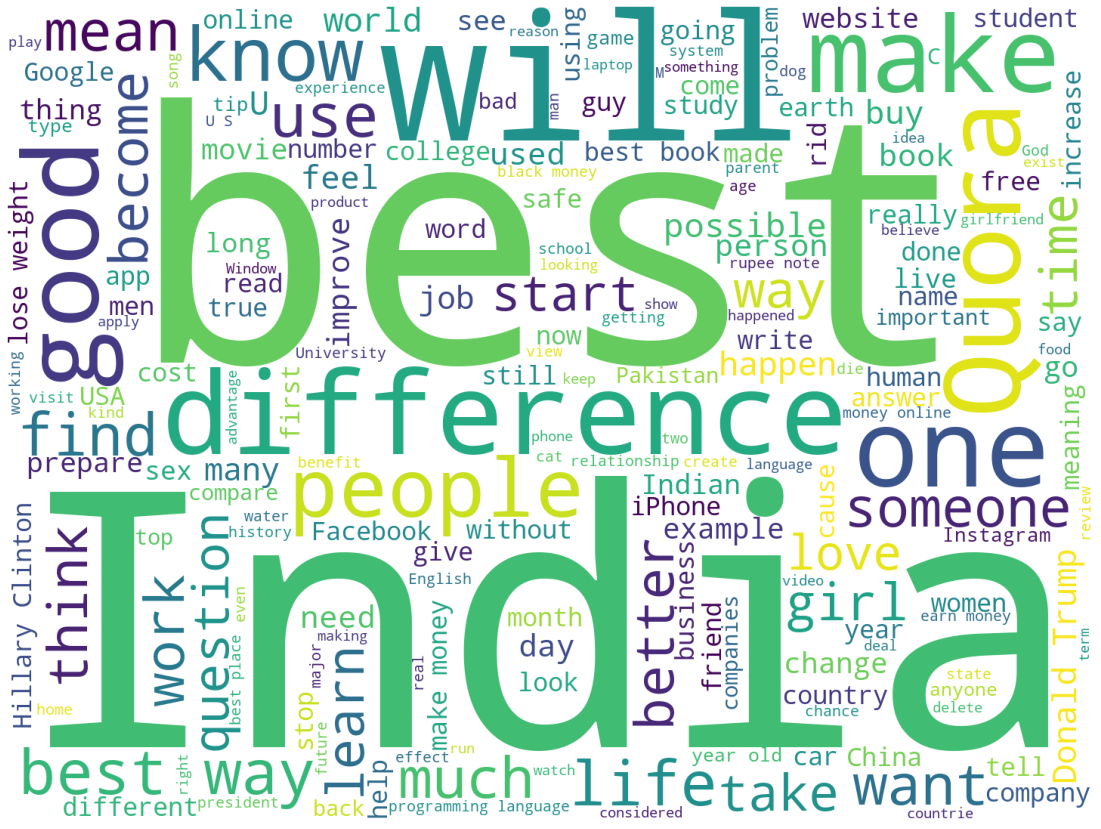

In [17]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080,background_color="white").generate(" ".join(df['question1'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

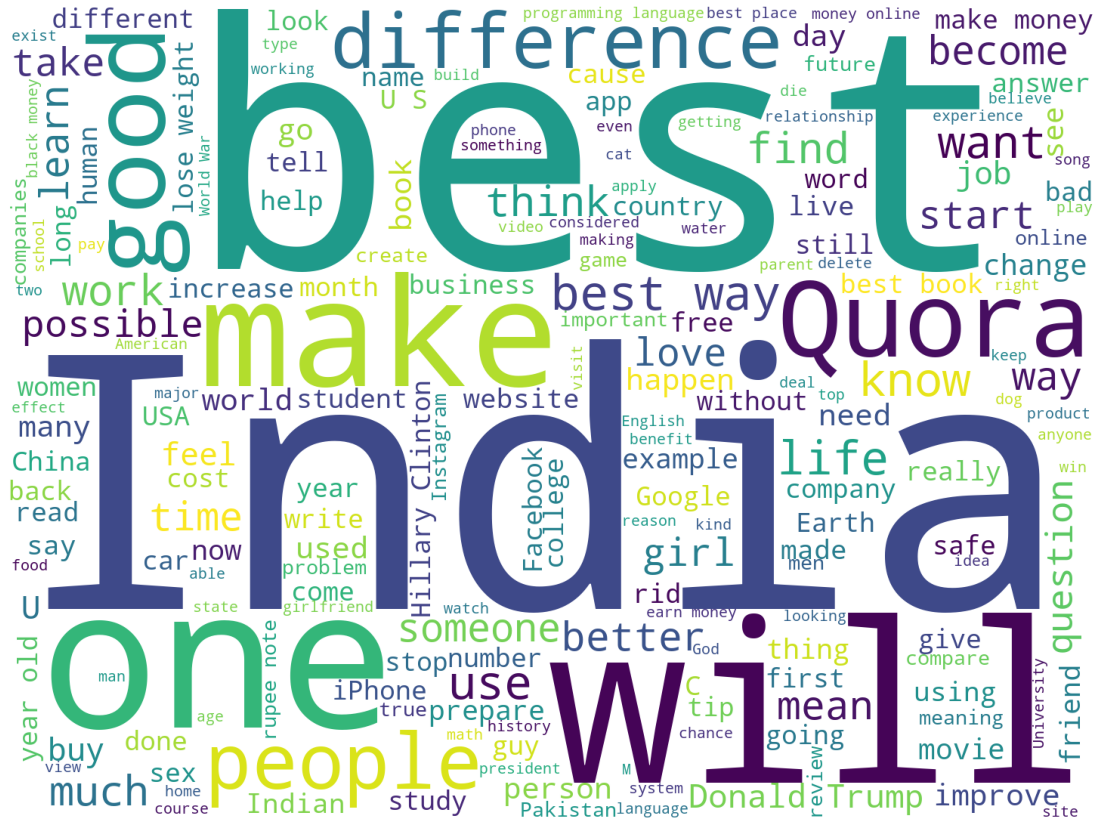

In [18]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080,background_color="white").generate(" ".join(df['question2'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
"""def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1']))
    w2 = set(map(lambda word: word.lower().strip(), row['question2']))   
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df['word_share'] = df.apply(normalized_word_share, axis=1)
"""

In [ ]:
"""plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:50000])
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:10000], color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:10000], color = 'red')"""

In [ ]:
#df=df.sample(100000,random_state=22)

In [19]:
#printing few question pairs in the datset
for i in range(0,10000):
    print(df.question1[i])
    print(df.question2[i])
  

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?
How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?
Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?
Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?
Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
Should I buy tiago?
What keeps childern active and far from phone and video games?
How can I be a good geologist?
What should I do to be a great geologist?
When do you use シ instead of し?


What happens if dictatorship is continuing in the present days?
What happens if a dictatorship continues in the present day?
What makes a great cup of coffee great?
What makes a perfect cup of coffee?
Is the US election rigged?
Was the US election rigged?
Why hasn't Gayle Laakmann McDowell/careercup created a MOOC or a coding bootcamp?
Is Gayle Laakmann McDowell planning on publishing any more books? If so, what is she working on?
What is fermentation? What are some products of fermentation?
What are some fermented products?
What do you think about my short film, "ColorShift"?
What do you think about my short film?
Should there be a war between India and Pakistan for Kashmir?
Why is there a conflict between India and Pakistan on Kashmir?
What is the best way to get you food stamp card?
How can I get food stamps in college?
What are some real world example of encapsulation and abstraction and how are they different, yet related?
What are some examples of recursion in the real world?
Wha

Which is a suitable inpatient drug and alcohol rehab center in Heard County GA?
Where are some fish spas in Malacca / Melaka?
What is the Best place in kuala lumpur for cheap Shopping?
What can one do to relieve severe chronic pain?
What has worked for you to help relieve chronic pain?
What can I do to improve my English speaking?
How can I improve my spoken English?
What are some of the best history podcasts?
What is the best podcast in history?
Do Muslim in India, especially in Gujarat,India hate(still) Narendra Modi?
Why do some Indian Muslims hate Narendra Modi?
What are some benefits of being close friends with a lawyer?
What are some benefits of being close friends with a professor?
I'm a big guy. When I get angry, people get scared and accuse me of threatening them. How do I stop this? I'm not actually a violent person.
I block people when I'm angry. I refuse to talk to them. Why do I get angry for such small things?
Who really did frame Roger Rabbit?
What is the theme of Who Fr

What’s the difference between data, information and knowledge in machine systems? Or is there a difference?
What's the difference between a knowledge based system and an expert system?
What is the resistance of an ideal voltmeter and ammeter?
What is the actual resistance of ammeter and voltmeter that we use in laboratory?
What are some unexpected things first-time visitors to Guinea notice?
What are some unexpected things first-time visitors to Nepal notice?
Is it true that the new Rs. 2000 currency notes in India will have a nano GPS chip?
How much is the truth that the new high denomination currency of India are being embedded with GPS nano chips?
What is the best app for Berlin public transportation?
What are the best public transportation apps to help me in Berlin?
I'm thinking about making and then publishing a comic series featuring anthropomorphic Pokemon, but how do I do that without copyright infringement?
What do you think of the Doga comic series?
How much, if at all, will 

How do I heat up my laptop?
Why does my food heat up unevenly in the microwave?
Why are Japan and the U.S. so upset about the peace and prosperity in SCS and bilateral talk between the Philippines and China?
Why has Philippine polluted the SCS water by sinking its 2nd-hand US warship on Chinese island and should China do something about it?
How should I start learning Python?
How should I begin learning Python?
Does financial modelling have any scope in India?
What is the Scope of financial modelling in India?
How is Narendra Modi as a person?
What is like to meet Narendra Modi?
Which is the best startup accelerator?
Which are the best startup accelerators in Dallas?
Why do they say that one must not visit both Sri Kalahasti and Tirupathi?
What are must visit temples in India?
I don't feel like going to school and this is like everyday story. What should I do? I'm in 11th grade.
I'm 21. I no longer like going to school and don't see the point. I feel I'm so distant from friends recentl

Are public sector jobs and government jobs the same? If not the same, then what is the difference between them?
What is the difference between Public Sector Undertaking (PSU) jobs and government jobs in India?
How can I get out of my comfort zone and be myself at the same time?
How do I break out of my comfort zone?
What is the Syllabus of UPSC exams?
What is the syllabus for UPSC Exam?
Which equation in general relativity predicted the existence of black-holes ?
Is Run Ze Cao's falsification of Einstein's relativity valid?
What is the difference between a database analyst and a database administrator?
How do data analysts and data scientists interact with database administrators?
How do you control your anger?
How do I control my emotions and anger?
Why is Cricket not popular in US even though it was a British colony?
Why is cricket not popular in the US despite being a part of former British colonies?
Game of Thrones Season 6 Episode 4: What did the High Sparrow tell Tommen in secret

What happened to Luna Lovegood after Book 7?
Which is better AMD radeon r5 m335 4GB or Nvidia Geforce 940m 4GB graphic card for gaming?
Which is better AMD radeon r5 m335 4GB or Nvidia Geforce 940m 4GB graphic card for laptops?
What is the solution to this puzzle?
If you choose an answer to this question at random, what is the chance you will be correct? (A) 25% (B) 50% (C) 60% (D) 25%
What will be the effect in Stock market after the Indian Government's decision to demonitize 500 and 1000 rupee notes?
What will be the effect on share market after the banning of 500 and 1000 notes?
What do you think of PM's decision on the banning of 500 and 100 rupee notes?
What do you think of the decision by the Indian government to demonetize 500 and 1000 rupee notes?
How do I impress the boss's boss?
How do I impress my boss's boss?
What's the worst thing someone has done to you?
What is the worst thing that someone has done to you and how do you feel about it now?
My face has gained a lot of fat 

Tinder - how do I delete my interests?
Are the 'interests' on the Tinder app only displayed when there is a common interest?
How can I learn better in school/ How can I get better grades in school?
How can you get the best grades at school?
What were Fidel Castro's accomplishments?
Who is Fidel Castro?
What are some medications similar to antibiotics that you can purchase over the counter and without a prescription?
Are there any antibiotics that can be purchased over the counter?
Can you please let me know the password of your email-id? I need it for checking some things. INTERVIEW ANSWER TO THIS QUESTION
Can you please let me know the password of your email-id? I need it for checking some things.
How does packet switched network differs from circuit switched network?
How does packet switched network differ from circuit switched network?
How can I meet Modi?
How can I meet PM modi?
Can anyone apply to Google?
How do I have to apply to work at Google?
Can I get into M.tech program thro

Can we run out of resources?
Can I grow shorter?
Can I get shorter?
Why doesn’t anybody answer my questions on Quora?
Why nobody answer my questions in Quora?
What is potential differential and why is it important?
Why is potential differential important?
If the phone logo on FB messenger is grey is that means that my friend is on a call? And when it turn back blue it means that he's done with the call?
What does the grey phone icon on messenger mean?
What is the true meaning of "hear no evil, see no evil, speak no evil"?
What does evil incarnate mean?
Sensitive, thoughtful, sexual, Indian guy. Should I stay in this sexless marriage? Lots of detail in answer 1
Should I stay in a lovless marriage?
Do women like it when men stare at their bra straps?
Why do women flaunt bra straps?
If a women loses attraction for her husband and loses interest in sex, is it permanent, or can the marriage still be saved?
My husband keeps telling me to lose weight. I was fat before marriage too. If he does

How do I survive in a long distance relationship?
What are some best sources to learn programming?
What are the best sources to learn programming?
How electricity generated from water?
How is the electricity generated from water?
Do ghost actually exists?
Does ghost really exist?
How should I increase my concentration power?
How can I improve my concentration to the best?
How are women disadvantaged in 2016?
What are the business directory in Gold Coast?
Is it true that most colleges fill their early decision pool primarily with people with legacy and recruited athletes?
Why can't I remember what happened last night?
Rastriya military school blore?
I got 62% in X, 71% in XII and 61% in Graduation. What is the probability of getting a call from any of the IIMs if I score 99 percentile in CAT?
How can we find happiness in life?
How can I be happy?
What app for music without wifi for iPod?
What music app is free without wifi connection?
How do you feel about Donald Trump attacking the Kha

Why would you use "if __name__ == '__main__'"?
Does one need to change Django App name?
What are the differences between Ubuntu OS and Ubuntu Gnome OS?
Will there be any problem if I use Ubuntu as my primary os?
How do I make fluffy pancakes?
How do I make my pancakes fluffier?
General Knowledge: What is the smell of nerd?
What should I do if my colleague is a know-it-all?
What is the principle of an HGM ultrafine grinding mill?
What are the part inside an grinding mill?
How do you know who is a beggar?
Can begging be dropped?
What are some techniques to prevent the transfer the vibration from engine to the frame?
Can Benadryl make you addicted?
How can I deactivate or delete my Gmail account?
What is the best way to delete my Gmail account?
How does a skunk spray?
Why do skunks spray?
Desserts: What are some desserts whose names start with the letter 'L'?
Desserts: What are some desserts whose names start with the letter 'O'?
How do I cope with the loss of my wife?
What is the best wa

How do I gain weight fast, without expensive supplements?
How can I score good marks in GRE?
How do I prepare for GRE?
Which is the premier institute to prepare for CFA?
Which is the best coaching class for CFA Level 1 in Mumbai?
Will religion ever die?
Will religion ever die out?
I am 24 earning 1 lakh per month in Bangalore and received one more offer should I work or not? How should I manage the work?
I have 4.5 lakhs saved up in my bank account and earn 50k per months.I have earned that money working on projects. I am 20 years and want to generate passive income. What should I do with the money or how should I invest it?
What are the best street foods in delhi?
What are the best street food places of delhi?
Why do we use chi-square test?
What is the chi-square test and how is it applied?
How many calories are burn in stair climbing 150 stairs?
How many calories do you burn climbing 125 stairs?
What is the best method of losing weight?
What is the most effective everlasting method o

Should I be learning Swift?
Should I learn Swift (the programming language)?
How come Saudi princes aren't the richest in the world?
Why isn't Google the richest company in the world?
If my wife went to the hospital 2 days straight, sent home with a CO2 level of 6 and low glucose and 2 days later the baby dies. Are they at fault?
Two months ago I slept with someone without using protection, the next day I took the after pill and a few weeks later I got my period. However, I have been gaining weight, Could I possibly be pregnant?
Why does M.S Dhoni left captaincy for ODI and T20?
Why did MS Dhoni resign as ODI and T20 Captain?
What are the various options available after graduating from an IIT?
Can someone get a 60 lacs+ package while working in India after graduating from IIT Delhi?
How do I install OS X on a Hyper-V VM?
Can I install OS X v10.10 Yosemite on my HP laptop?
Do you like to travel alone?
Do you like to travel?
Has life been found on any other planet?
Is there life on other

Which is better between PU Leather and FAUX Leather?
Can a manmade material be made equal or better than leather?
How does whistleblowing relate to ethics?
Is whistleblowing ethical?
Why is India failing so miserably at the Rio Olympics?
Why is India not producing good athletes?,if so why India is failing in olympics,world events
What characterizes a concrete question?
How do I turn off hypothetical questions on Quora?
How did you become passionate about studying what you're passionate about studying?
How do I become passionate about studies?
Should highschool students be able to choose their subjects? If so, which countries are the best examples?
Do you think students should be able to choose every subject they want to learn or should there be subjects which are mandatory?
How can I get rid of acne scars on face?
How did you get rid of acne scars on face?
How do you know if someone is a psychopath?
How do you know if someone is a psychopath or a sociopath?
On the 15th I am going to Ge

Which research areas of neuroscience attract the brightest minds?
Which research areas of chemistry attract the brightest minds?
How can I prevent getting a small lump in my earlobe?
How are small lumps in the earlobe removed?
Can there be someone who's never had sex throughout their lives?
Who are some popular female television show characters who do not want and never have children throughout the duration of their television show?
What are the services provided by PcKure.com?
What service is provided by klear.com?
What is the shortest sentence that has all 26 letters in the English alphabet?
Can you think of a sentence containing all the letters of the alphabet?
Do you know how many Gili islands are there in Lombok?
How many islands are countries?
Has San Francisco lost its soul?
Did San Francisco lose its soul?
If I unfollow "Friend A" on Facebook. Will they get notified if I follow them again?
What is the fastest way to get 10,000 Instagram followers if you don't have a Facebook ac

How can I meet Dr dre?
How did The D.O.C meet Dr. Dre?
What is the best thing you have ever done for others?
What is the best thing you have ever done?
Did matter exist before the big bang?
Did the void exist before the Big Bang?
How much an average human mind can store information?
How much information can human brain store?
Are these videos on YouTube about fake images of earth from NASA true?
Are these videos on Youtube about fake images of Earth from NASA true or not?
Is the definition of a media business any business which derives its income from advertising?
How do I advertise small business free?
What is the conclusion of the movie Before we go?
What is the explanation for the ending of the movie Before We Go?
What is an intuitive explanation of a scheme?
What is an intuitive explanation of projective schemes?
What are the minimum living expenses per month in Dubai for a software engineer?
What are the minimum living expenses per month in Dubai for a student?
Is there any countr

What was the best experience of your life?
What's the best experience of your life? Why?
How can I kill myself?
My life got destroyed for absolutely no reason. What are some ways to kill myself?
What are the best ways to make a woman wet?
How can I make a girl go wet?
Why is my Miniature Pinscher/Chihuahua mix afraid of cats?
Why is my puppy afraid of cats?
How can I get started learning Hindi?
How do non native hindi speakers perceive Hindi as a language? How difficult do they find it to learn reading and writing?
Where can I find affordable but good help for completing mobile app development projects?
How much is Greek spoken in Turkey?
Why are people still trying to make new technological advances to learn about space?
Do new technologies help or hinder learning?
How can I get meth out of my system in two days?
How can I flush meth out of my blood?
What can I expect in Morgan Stanley Codeathon 2016 starting on 6 August 2016?
What is the interview process of Morgan Stanley through Co

Did Marvel pick the right cast for Spider-man Homecoming?
How do I increase our height after 21?
How can I increase my height after 21 also?
How do I turn off the screen overlay in Samsung j7?
How can I change the screen overlay setting in Samsung J7 with Android marshmallow?
Is an adopted Chinese person without Chinese friends or family as smart as one connected to the collective?
Why did the Chinese never adopt word spacing?
What would you say is the one thing that got you where you're at today?
What is the one thing that made you the person you are today?
Shayri on love Gujarati lyrics?
What is a capillary wall? What are its functions?
How can the ban of 500 and 1000 rupee notes increase the Indian economy?
How is banning 500 and 1000 INR going to help Indian economy?
Can I make 10 million a year as a day trader?
Can I make 50 million dollars day trading?
What is the most looped Vine?
How do I use Vine?
Where can I get scholarship for data science in Asia?
Where can I get scholarshi

What makes us happy?
What makes us happy and why?
Can a person survive on only eating sugar? If so, how long?
If one knows he isn't going to eat for a long time, how long could he survive on feces and urine if he was well fed?
I want to explore the Dark net. What should I know first?
What are all the markets that exist on the dark net?
How were characters developed on "The West Wing"?
The West Wing (TV series): Did people like the character of Josh Lyman?
How does it feel to be a cyber "coolie" guys?
What is cyber security?
What movie have you watched that changed your life?
What movie have you watched that made you think it's life changing?
How many years does it take to become a Senior Associate from Associate in CTS?
How many years it take to become associate from PA in CTS?
I've given my car to Packers and movers. How do I know if they have driven the car or taken it by carrier?
How do you find numerical value?
Is Hillary Clinton going to go to jail?
Will Hillary Clinton go to jail

In [20]:
df.shape

(404290, 10)

In [21]:
X, y = df[df.columns[3:5]], df['is_duplicate']

# NLP for Supervised Learning

### Classification of similar questions :
- Text Preprocessing


In [22]:
from token import *
# Clean the text, with the option to remove stop_words and to stem words.
def normalized_text(text,stem_words=True):
    if pd.isnull(text):  #If null
        return ''
    # Empty question
    if type(text) != str or text=='':  #if text type is not string
        return ''
     # Clean the text
    text = re.sub(" whats ", " what is ", text) # replace whats by what is and ignore case
    text = re.sub("\'ve", " have ", text) # replace 've by have
    text = re.sub("can't", "can not", text) # replace can't by can not
    text = re.sub("n't", " not ", text) # replace n't by not
    text = re.sub("i'm", "i am", text) # replace i'm by i am and ignore case
    text = re.sub("\'re", " are ", text) # replace 're by are
    text = re.sub("\'d", " would ", text) # replace 'd by would
    text = re.sub("\'ll", " will ", text) # replace 'll by will
    text = re.sub("e\.g\.", " eg ", text) # replace e.g. by eg and ignore case
    text = re.sub("b\.g\.", " bg ", text) # replace b.g. by bg and ignore case
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text) 
    text = re.sub("e-mail", " email ", text)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
     # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
    
    # add padding to punctuations and special chars, we still need them later
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
    
    # cleaning text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" \w*\d\w*", " ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r" intially ", " initially ", text)
    text = re.sub(r" dms ", " direct messages ", text)  
    text = re.sub(r" demonitization ", " demonetization ", text) 
    text = re.sub(r" actived ", " active ", text)
    text = re.sub(r" kms ", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvote", " up vote", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r" \0rs ", " rs ", text)
    text = re.sub(r" calender ", " calendar ", text)
    text = re.sub(r" ios ", " operating system ", text)
    text = re.sub(r" programing ", " programming ", text)
    text = re.sub(r" bestfriend ", " best friend ", text)
    text = re.sub(r" dna ", " DNA ", text)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" J K ", " JK ", text)
    text = re.sub(r" J\.K\. ", " JK ", text)
    
    # replace the float numbers with a random number
    text = re.sub('[0-9]+\.[0-9]+', "", text)
   
    #Removing Punctuations
    punctuation=string.punctuation
    text = [word for word in text if word not in punctuation]
    text = ''.join(text)

    stemmer = WordNetLemmatizer()
    # Lemmatization
    text = [stemmer.lemmatize(word) for word in text]
    text = ''.join(text)
    # Return a list of words
    return text

In [23]:
#applying text cleaning function to question text
X['question1'] = X['question1'].apply(normalized_text)
X['question2'] = X['question2'].apply(normalized_text)

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
X['question1'] = X['question1'].apply(lambda x: ''.join([word for word in x if word not in (stop)]))
X['question2'] = X['question2'].apply(lambda x: ''.join([word for word in x if word not in (stop)]))


In [29]:
#printing few question pairs in the datset after clean
for i in range(0,100):
    print(X.question1[i])
    print(X.question2[i])
  

Wh  he ep b ep gue  nve n hre rke n n
Wh  he ep b ep gue  nve n hre rke
Wh  he r f Khnr KhNr Dn
Wh wul hppen f he Inn gvernen le he Khnr KhNr n bck
Hw cn I ncree he pee f  nerne cnnecn whle ung  VPN
Hw cn Inerne pee be ncree b hckng hrugh DNS
Wh  I enll ver lnel Hw cn I lve 
Fn he rener when h2324h  ve b 
Whch ne lve n wer qukl ugr l ehne n crbn  xe
Whch fh wul urvve n l wer
Arlg I   Cprcrn Sun Cp n n cp rngwh e h  bu e
I  rple Cprcrn Sun Mn n cenn n Cprcrn Wh e h  bu e
Shul I bu g
Wh keep chlern cve n fr fr phne n ve ge
Hw cn I be  g gelg
Wh hul I   be  gre gelg
When  u ue シ ne f し
When  u ue  n  ne f n
Mrl cpn Cn I hck  Chrer Mrll 
Hw  I hck Mrl  fr free nerne
Meh  fn eprn f l ung frenel bpr
Wh re e f he hng echncn cn ell bu he urbl n relbl f Lpp n  cpnen
Hw  I re n fn  YuTube cen
Hw cn I ee ll  Yuube cen
Wh cn ke Phc e  lern
Hw cn u ke phc e  lern
Wh w ur fr exul experence lke
Wh w ur fr exul experence
Wh re he lw  chnge ur u fr  uen v   green cr n he US hw  he cpre  he grn lw n Cn


- Training and Test Sets


In [26]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Converting Text to Numbers

In [27]:

# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,question1,question2
0,1,0
1,0,1


- Training Text Classification Model and Predicting 


#### Try classifying using Logistic Regression

In [ ]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

- Evaluating The Model
- Saving and Loading the Model

In [ ]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [ ]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

 # Topic Modelling  of questions :

- Removing stopwords and punctuation marks
- Stemming
- Lemmatization
- Encoding them to ML language using Countvectorizer or Tfidf vectorizer